In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/HP/Desktop/Data_Sets/ETS2/ETS_Ready_to_ML.csv')

In [3]:
print(data.shape)
data.head()

(720, 24)


,Cargo ID,Cargo Weight,Transport Distance,Hour,Minutes,Ferry?,Ferry Length,Ferry Cost,Origin City ID,Origin Country,...,Transport Type,Trailer Type,High Value Cargo,Heavy Cargo,Fragile Cargo,ADR Cargo,ADR Class & Type,Special Transport,Price Per KM,Price
0,1,12,2383,33,55,1,60,300,0,3,...,1,4,1,0,0,0,0,0,52.73,126556
1,35,9,847,12,56,0,0,0,68,10,...,0,3,0,0,0,0,0,0,21.01,18393
2,35,9,317,4,39,0,0,0,13,6,...,0,3,0,0,0,0,0,0,19.73,6853
3,53,22,1011,14,42,0,0,0,90,7,...,0,3,0,0,0,0,0,0,26.33,27215
4,53,22,771,11,23,0,0,0,60,5,...,0,3,0,0,0,0,0,0,25.55,20300


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [5]:
data.columns

Index(['Cargo ID', 'Cargo Weight', 'Transport Distance', 'Hour', 'Minutes',
       'Ferry?', 'Ferry Length', 'Ferry Cost', 'Origin City ID',
       'Origin Country', 'Origin Company', 'Destination City ID',
       'Destination Country', 'Destiantion Company', 'Transport Type',
       'Trailer Type', 'High Value Cargo', 'Heavy Cargo', 'Fragile Cargo',
       'ADR Cargo', 'ADR Class & Type', 'Special Transport', 'Price Per KM',
       'Price'],
      dtype='object')

In [6]:
cols=['Cargo ID', 'Cargo Weight', 'Transport Distance', 'Hour', 'Minutes',
       'Ferry?', 'Ferry Length', 'Ferry Cost', 'Origin City ID',
       'Origin Country', 'Origin Company', 'Destination City ID',
       'Destination Country', 'Destiantion Company','Transport Type',
        'High Value Cargo', 'Heavy Cargo', 'Fragile Cargo',
       'ADR Cargo', 'ADR Class & Type', 'Special Transport', 'Price Per KM',
       'Price']

In [7]:
train=data[['Cargo ID', 'Cargo Weight', 'Transport Distance', 'Hour', 'Minutes',
       'Ferry?', 'Ferry Length', 'Ferry Cost', 'Origin City ID',
       'Origin Country', 'Origin Company', 'Destination City ID',
       'Destination Country', 'Destiantion Company', 'Transport Type',
        'High Value Cargo', 'Heavy Cargo', 'Fragile Cargo',
       'ADR Cargo', 'ADR Class & Type', 'Special Transport', 'Price Per KM',
       'Price']]

In [8]:
test=np.array(data['Trailer Type'])

In [9]:
test=test.reshape(-1,1)

### Fitting Normal Decision Tree

In [13]:
Dtree=DecisionTreeClassifier()
Dtree=Dtree.fit(train,test)

print(Dtree.feature_importances_)
print(Dtree.score(train,test))

[0.14373981 0.10410142 0.02755776 0.00696762 0.03780725 0.00356552
 0.00558598 0.         0.03958719 0.01879134 0.04110599 0.0206133
 0.02539446 0.00936054 0.01027981 0.17645122 0.         0.01891768
 0.         0.10799605 0.         0.16785012 0.03432691]
1.0


In [17]:
# generating our tree visualization
from sklearn import tree
with open("C:/Users/HP/Desktop/Data_Sets/ETS2/Dtree.txt",'w') as f:
    f=tree.export_graphviz(Dtree,out_file=f,feature_names=cols)


 Accuracy score: 1.0


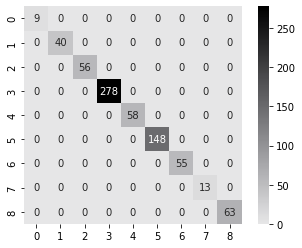

In [19]:
# Making tree prediction
Dtree_predict=Dtree.predict(train)

# comparing the results

acc=accuracy_score(test,Dtree_predict)
print('\n Accuracy score:',acc)

# creating confusion matrix

conf=confusion_matrix(test,Dtree_predict)
cmap=sns.cubehelix_palette(50,hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['0','1','2','3','4','5','6','7','8'],yticklabels=['0','1','2','3','4','5','6','7','8'],
            annot=True,square=True,fmt='d')
plt.show()

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(test,Dtree_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00       278
           4       1.00      1.00      1.00        58
           5       1.00      1.00      1.00       148
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        63

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



### Decision Tree with some restriction

[0.1185591  0.0813087  0.01678222 0.         0.00672068 0.
 0.         0.         0.         0.         0.         0.
 0.00552153 0.001256   0.         0.32714178 0.         0.03257846
 0.         0.20022543 0.         0.2044371  0.00546901]
0.7569444444444444

 Accuracy score: 0.7569444444444444


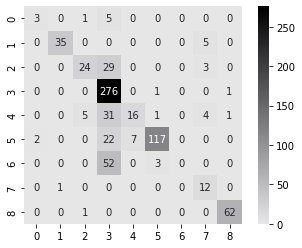

In [10]:
## min_sample_split=mss

DT=DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=6,min_samples_split=10,min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0)
DT=DT.fit(train,test)

print(DT.feature_importances_)
print(DT.score(train,test))

# generating our tree visualization
from sklearn import tree
with open("C:/Users/HP/Desktop/Data_Sets/ETS2/DT_mss10.txt",'w') as f:
    f=tree.export_graphviz(DT,out_file=f,feature_names=cols)

    
# Making tree prediction
DT_predict=DT.predict(train)

# comparing the results

acc=accuracy_score(test,DT_predict)
print('\n Accuracy score:',acc)

# creating confusion matrix

conf=confusion_matrix(test,DT_predict)
cmap=sns.cubehelix_palette(50,hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['0','1','2','3','4','5','6','7','8'],yticklabels=['0','1','2','3','4','5','6','7','8'],
            annot=True,square=True,fmt='d')
plt.show()

[0.0843345  0.11420221 0.00589965 0.         0.0050959  0.
 0.         0.         0.00574634 0.00413754 0.03205241 0.00400286
 0.00458474 0.         0.00887986 0.2843828  0.         0.02917731
 0.0421809  0.13490024 0.         0.24042276 0.        ]
0.7555555555555555

 Accuracy score: 0.7555555555555555


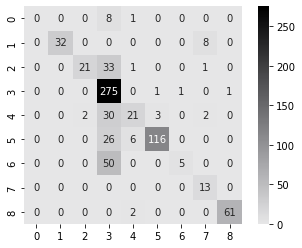

In [11]:
# Entropy with mss10

DT=DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=6,min_samples_split=10,min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0)
DT=DT.fit(train,test)

print(DT.feature_importances_)
print(DT.score(train,test))

# generating our tree visualization
from sklearn import tree
with open("C:/Users/HP/Desktop/Data_Sets/ETS2/DT_ENT_mss10.txt",'w') as f:
    f=tree.export_graphviz(DT,out_file=f,feature_names=cols)

    
# Making tree prediction
DT_predict=DT.predict(train)

# comparing the results

acc=accuracy_score(test,DT_predict)
print('\n Accuracy score:',acc)

# creating confusion matrix

conf=confusion_matrix(test,DT_predict)
cmap=sns.cubehelix_palette(50,hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['0','1','2','3','4','5','6','7','8'],yticklabels=['0','1','2','3','4','5','6','7','8'],
            annot=True,square=True,fmt='d')
plt.show()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(test,DT_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.80      0.89        40
           2       0.91      0.38      0.53        56
           3       0.65      0.99      0.79       278
           4       0.68      0.36      0.47        58
           5       0.97      0.78      0.87       148
           6       0.83      0.09      0.16        55
           7       0.54      1.00      0.70        13
           8       0.98      0.97      0.98        63

    accuracy                           0.76       720
   macro avg       0.73      0.60      0.60       720
weighted avg       0.79      0.76      0.72       720



C:\Users\HP\NewAnaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\NewAnaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\NewAnaconda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.16352462 0.09839843 0.01375884 0.         0.01120049 0.
 0.         0.         0.01017659 0.00170617 0.02176832 0.01051332
 0.01010329 0.00102972 0.         0.26820583 0.         0.02670932
 0.         0.16415398 0.         0.19597351 0.00277757]
0.8097222222222222

 Accuracy score: 0.8097222222222222


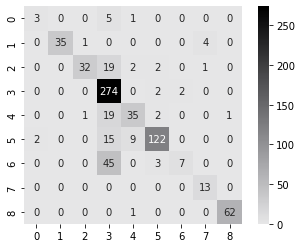

In [14]:
# gini mss10 maxdep10

DT=DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=10,min_samples_split=10,min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0)
DT=DT.fit(train,test)

print(DT.feature_importances_)
print(DT.score(train,test))

# generating our tree visualization
from sklearn import tree
with open("C:/Users/HP/Desktop/Data_Sets/ETS2/DT_GINI_mss10_md10.txt",'w') as f:
    f=tree.export_graphviz(DT,out_file=f,feature_names=cols)

    
# Making tree prediction
DT_predict=DT.predict(train)

# comparing the results

acc=accuracy_score(test,DT_predict)
print('\n Accuracy score:',acc)

# creating confusion matrix

conf=confusion_matrix(test,DT_predict)
cmap=sns.cubehelix_palette(50,hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['0','1','2','3','4','5','6','7','8'],yticklabels=['0','1','2','3','4','5','6','7','8'],
            annot=True,square=True,fmt='d')
plt.show()

In [15]:
DT.predict([[1,12,2383,33,55,1,60,300,0,3,19,94,0,20,1,1,0,0,0,0,0,52.73,126556]])

C:\Users\HP\NewAnaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [16]:
DT.predict([[224,13,135,2,1,0,0,0,94,0,7,8,11,22,1,0,0,0,0,0,0,27.45,4306]])

C:\Users\HP\NewAnaconda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

C:\Users\HP\AppData\Local\Temp/ipykernel_3532/3266877208.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest=forest.fit(train,test)


Score: 1.0

 Accuacy score: 1.0


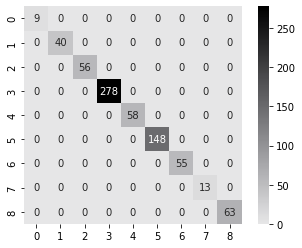

In [17]:
forest=RandomForestClassifier()

forest=forest.fit(train,test)
print("Score:",forest.score(train,test))

# Making forest prediction

forest_predict=forest.predict(train)

# comparing the results

acc=accuracy_score(test,forest_predict)
print('\n Accuacy score:',acc)

# creating confusion matrix

conf=confusion_matrix(test,forest_predict)
cmap=sns.cubehelix_palette(50,hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['0','1','2','3','4','5','6','7','8'],yticklabels=['0','1','2','3','4','5','6','7','8'],
            annot=True,square=True,fmt='d')
plt.show()

C:\Users\HP\AppData\Local\Temp/ipykernel_3532/2939966685.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest=forest.fit(train,test)


Score: 0.9444444444444444

 Accuacy score: 0.9444444444444444


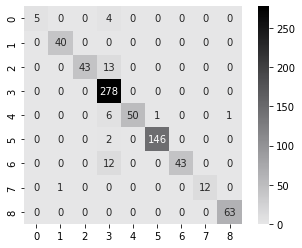

In [23]:
forest=RandomForestClassifier(max_depth=15,min_samples_split=5,n_estimators=50,random_state=1)


forest=forest.fit(train,test)
print("Score:",forest.score(train,test))

# Making forest prediction

forest_predict=forest.predict(train)

# comparing the results

acc=accuracy_score(test,forest_predict)
print('\n Accuacy score:',acc)

# creating confusion matrix

conf=confusion_matrix(test,forest_predict)
cmap=sns.cubehelix_palette(50,hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['0','1','2','3','4','5','6','7','8'],yticklabels=['0','1','2','3','4','5','6','7','8'],
            annot=True,square=True,fmt='d')
plt.show()